**What you will learn in this notebook**

*   Understanding how to build a simple PyTorch model.
*   Understanding how to make a custom dataloader using torch **Datasets** and **Dataloader**.
*   Understanding how to train a PyTorch model.
*   Understanding how to effectively tune hyperparamters in pytorch.

In [76]:
import torch
import numpy as np
import pandas as pd
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import seaborn as sns

In [77]:
cars_file = "https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv"

In [78]:
cars = pd.read_csv(cars_file)
cars.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


<Axes: xlabel='wt', ylabel='mpg'>

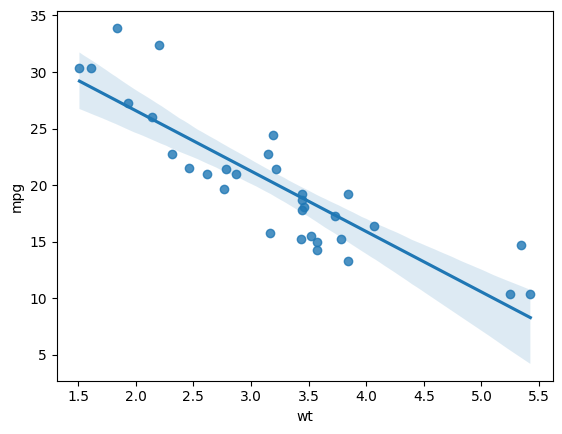

In [79]:
sns.regplot(x='wt', y='mpg', data=cars)

In [80]:
# define custom dataloader class for linear regression
class LinearrRegressionDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    return self.X[index], self.y[index]

# define a torch model for linear regression
class LinearrRegressionModel(nn.Module):
  def __init__(self, input_size, output_size):
    super(LinearrRegressionModel, self).__init__()
    self.linear = nn.Linear(in_features=input_size, out_features=output_size)

  def forward(self, x):
    return self.linear(x)

In [81]:
# prepare dataset
X_list = cars.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1, 1)

y_list = cars.mpg.values
y_np = np.array(y_list, dtype=np.float32).reshape(-1, 1)

In [82]:
# hyperparamters

BATCH_SIZE = 1
learning_rate = 0.01
num_epochs = 1000

train_loader = DataLoader(dataset=LinearrRegressionDataset(X_np, y_np), batch_size=BATCH_SIZE)

In [83]:
model = LinearrRegressionModel(input_size=1, output_size=1)
criterion = nn.MSELoss()  # loss function
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [84]:
# Training Loop
for epoch in range(num_epochs):
    for X_batch, y_batch in train_loader:
        # Forward pass
        y_pred = model(X_batch)

        # calculate loss b/w predicted and ground truth values
        # print(y_pred.shape, y_batch.shape)
        loss = criterion(y_pred, y_batch)

        # remove (zero) the previous gradients
        optimizer.zero_grad()

        # backward pass (backpropagation)
        loss.backward()

        # update parameters
        optimizer.step()


    if (epoch+1) % 100 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [100/1000], Loss: 0.3335
Epoch [200/1000], Loss: 0.2607
Epoch [300/1000], Loss: 0.2595
Epoch [400/1000], Loss: 0.2595
Epoch [500/1000], Loss: 0.2595
Epoch [600/1000], Loss: 0.2595
Epoch [700/1000], Loss: 0.2595
Epoch [800/1000], Loss: 0.2595
Epoch [900/1000], Loss: 0.2595
Epoch [1000/1000], Loss: 0.2595


In [85]:
# extract the learned weight and bias for linear regression
# y = weight * x + bias

weight = model.linear.weight.data[0]
bias = model.linear.bias[0].data

<Axes: xlabel='wt', ylabel='mpg'>

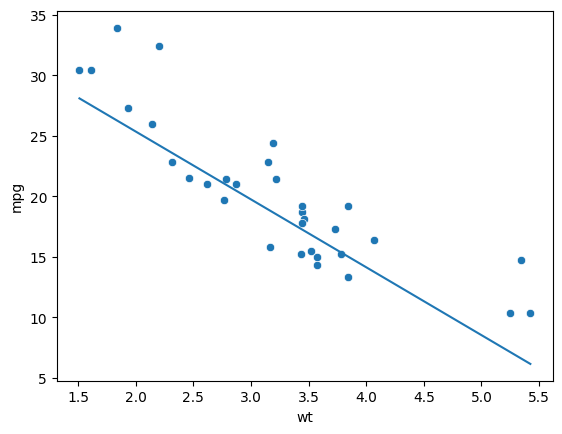

In [86]:
# visualize the results
y_pred = X_list*weight.detach().numpy() + bias.detach().numpy()
sns.scatterplot(x='wt', y='mpg', data=cars)
sns.lineplot(x=X_list, y=y_pred)